In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 

In [2]:
data = pd.read_csv("gas_turbines.csv")
data 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
data.describe() 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [5]:
data.corr() 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


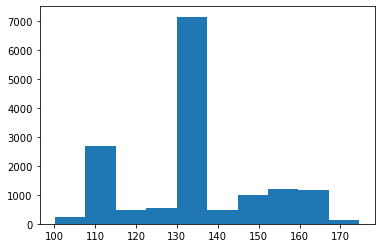

In [7]:
import matplotlib.pyplot as plt
plt.hist(data['TEY'])
plt.show()

array([[<AxesSubplot:title={'center':'AT'}>,
        <AxesSubplot:title={'center':'AP'}>,
        <AxesSubplot:title={'center':'AH'}>],
       [<AxesSubplot:title={'center':'AFDP'}>,
        <AxesSubplot:title={'center':'GTEP'}>,
        <AxesSubplot:title={'center':'TIT'}>],
       [<AxesSubplot:title={'center':'TAT'}>,
        <AxesSubplot:title={'center':'TEY'}>,
        <AxesSubplot:title={'center':'CDP'}>],
       [<AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'NOX'}>, <AxesSubplot:>]],
      dtype=object)

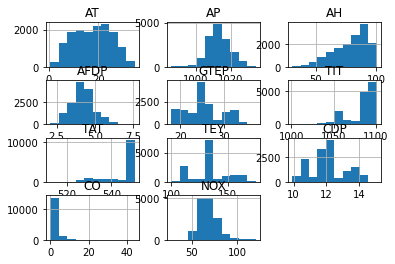

In [8]:
data.hist()


<AxesSubplot:>

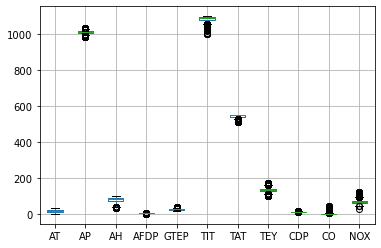

In [9]:
data.boxplot() 

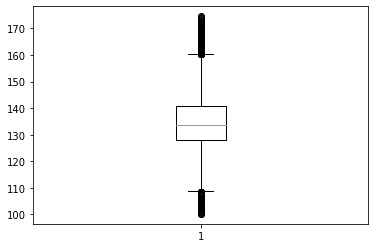

In [10]:
plt.boxplot(data['TEY'])
plt.show() 

In [11]:
X = pd.concat([data.iloc[:,0:7],data.iloc[:,8:11]],axis=1)
Y = data['TEY'] 

In [12]:
X 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [13]:
Y 

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [14]:
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X) 

In [15]:
X_standardized 

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [16]:
pd.DataFrame(X_standardized).describe() 

,0,1,2,3,4,5,6,7,8,9
count,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04
mean,-2.320107e-16,-1.925280e-14,1.844983e-16,3.810001e-16,1.107344e-16,-2.324212e-15,1.744899e-15,3.640356e-16,1.953355e-17,-6.862579e-17
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00,-2.779497e+00,-1.806771e+00,-5.021933e+00,-4.188141e+00,-1.992416e+00,-8.874862e-01,-3.861033e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01,-6.266930e-01,-5.091458e-01,-2.540512e-01,-4.101146e-01,-4.354335e-01,-5.015202e-01,-6.578107e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01,-1.854065e-02,-8.075681e-02,2.965544e-01,5.712570e-01,-7.011925e-02,-2.620452e-01,-1.518527e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01,4.612196e-01,4.228638e-01,7.382490e-01,5.928675e-01,4.311680e-01,8.455882e-02,5.486567e-01
max,2.266234e+00,3.275970e+00,1.528011e+00,4.486233e+00,2.871006e+00,1.028678e+00,6.627839e-01,2.700105e+00,1.895949e+01,4.937717e+00


In [17]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam 

In [18]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model 

In [19]:
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
from sklearn.model_selection import cross_val_score
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std())) 

C:\Users\DELL\AppData\Local\Temp/ipykernel_11452/2153497174.py:7: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)


Results: -17653.07 (1689.24) MSE


In [20]:
estimator.fit(X, Y)
prediction = estimator.predict(X)
prediction 

array([1.4471629, 1.4471629, 1.4471629, ..., 1.4471629, 1.4471629,
       1.4471629], dtype=float32)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3) 

In [22]:
estimator.fit(X_train, Y_train)
prediction = estimator.predict(X_test) 

In [23]:
prediction 

array([1.2572495, 1.2572495, 1.2572495, ..., 1.2572495, 1.2572495,
       1.2572495], dtype=float32)

In [24]:
from sklearn.preprocessing import scale
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled 

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [25]:
import tensorflow as tf
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
                             ]) 

In [26]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError']) 

In [27]:
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, Y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2) 

Epoch 1/100
381/381 - 2s - loss: 2954.5112 - mean_squared_error: 2954.5112 - val_loss: 195.8592 - val_mean_squared_error: 195.8592 - 2s/epoch - 7ms/step
Epoch 2/100
381/381 - 1s - loss: 105.1108 - mean_squared_error: 105.1108 - val_loss: 94.8378 - val_mean_squared_error: 94.8378 - 1s/epoch - 3ms/step
Epoch 3/100
381/381 - 1s - loss: 48.1870 - mean_squared_error: 48.1870 - val_loss: 37.6970 - val_mean_squared_error: 37.6970 - 1s/epoch - 3ms/step
Epoch 4/100
381/381 - 1s - loss: 18.6527 - mean_squared_error: 18.6527 - val_loss: 12.6890 - val_mean_squared_error: 12.6890 - 1s/epoch - 3ms/step
Epoch 5/100
381/381 - 1s - loss: 7.0548 - mean_squared_error: 7.0548 - val_loss: 5.4191 - val_mean_squared_error: 5.4191 - 977ms/epoch - 3ms/step
Epoch 6/100
381/381 - 1s - loss: 3.8002 - mean_squared_error: 3.8002 - val_loss: 3.1635 - val_mean_squared_error: 3.1635 - 1s/epoch - 3ms/step
Epoch 7/100
381/381 - 1s - loss: 2.4678 - mean_squared_error: 2.4678 - val_loss: 2.0990 - val_mean_squared_error: 2

In [28]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, Y_test) 

47/47 [==============================] - 0s 3ms/step - loss: 1.1439 - mean_squared_error: 1.1439
